## Question 1.

### 1)
Given the multinomial distribution of the day activity:
• Movies: 0.2

• COMP-551: 0.4

• Playing: 0.1

• Studying: 0.3

Provided that we can only sample from uniform distribution over (0,1), sampling the distribution is done by :

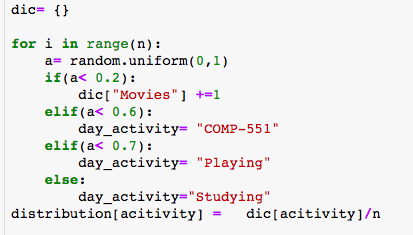


### 2) Implementation

In [1]:
import random
dic= {"Movies":0, "COMP-551":0,  "Playing":0, "Studying":0}
def sample( n):
    
    for i in range(n):
        a= random.uniform(0,1)
        if(a< 0.2):
            dic["Movies"] +=1
        elif(a< 0.6):
            dic[ "COMP-551"] +=1
        elif(a< 0.7):
            dic["Playing"] +=1
        else:
            dic["Studying"] +=1

def printRes(n):
    sample (n)
    for key,value in dic.items():
        print (key,value/n)

print("Sampling over 100 random probabilities :")
printRes(100) 
print("Sampling over 1000 random probabilities :")
printRes(1000)


Sampling over 100 random probabilities :
Movies 0.26
COMP-551 0.37
Playing 0.1
Studying 0.27
Sampling over 1000 random probabilities :
Movies 0.24
COMP-551 0.422
Playing 0.11
Studying 0.328


## 1.2
The fraction of days spent to each activity is closer to the true distribution when we sample over 1000 days than over 100 days

# Question 2 Model Selection
### 1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def load_dataset(path):
    x = []
    y = []
    with open(path) as data:
        for line in data:
            line = line.split(",")
            x.append(float(line[0]))
            y.append(float(line[1]))
    return x, y

def get_w(x, y):
    x_t = np.transpose(x)
    # w = (X^t*X)^-1*X^t*y
    temp1 = np.dot(x_t , x)
    inv = np.linalg.inv(temp1)
    temp2 = np.dot(inv , x_t)
    w= np.dot(temp2,y)
    return w

def powsMatrix(x_values, degree):
    matrix = []
    for x in x_values:
        #print(x)
        pows = []
        for i in range(degree+1):
            pows.append(pow((x),i))
        matrix.append(pows)
    return matrix
    
x_train , y_train = load_dataset("./Datasets/Dataset_1_train.csv")
pows = powsMatrix(x_train, 20)
w_matrix = get_w(pows, y_train)



Train MSE :  6.474752064154863
MSE Validation:  1421.1635301853185


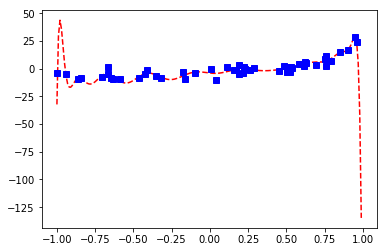

In [3]:
def getModelFunction(x, w, degree):
    su=0
    for n in range(degree+1):
        su+=w[n]*(pow(x,n)) #f(x)=x^t*w
    #print (co)
    return su

def compute_MSE(x, y, fct, w, degree):
    MSE=0
    for i in range(len(x)):
        MSE+=pow((fct(x[i], w, degree)-y[i]), 2)
    return MSE/len(x)


index = np.arange(-1, 1, 0.01)
pred = []
for i in index:
    pred.append(getModelFunction(i, w_matrix, 20))

x_valid , y_valid = load_dataset("./Datasets/Dataset_1_valid.csv")

print("Train MSE : " ,(compute_MSE(x_train,y_train,getModelFunction, w_matrix, 20)))
print("MSE Validation: " ,(compute_MSE(x_valid,y_valid,getModelFunction, w_matrix, 20)))
plt.plot(index, pred, 'r--', x_train, y_train, 'bs')
plt.show()

### c) Overfitting 
Since the validation MSE is much higher than the training MSE we can infer that there is obviously an overfitting.The reason to that is the learned polynom fits too much the training data and gets too high coefficients and thus fits worst the validation data.

## 2. Add regularization

The optimal lambda : 0.02001


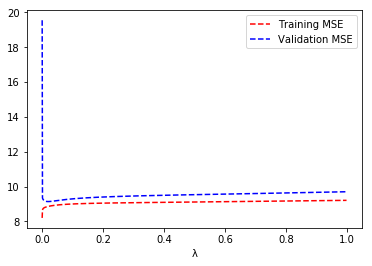

In [4]:
def getMatrixRegul(x, y, lamb, degree):
    x_t = np.transpose(x)
    # w = (X^t*X+lambda*I)^-1*X^t*y
    temp1= np.dot(x_t,x) +lamb*np.eye(degree+1)
    inv = np.linalg.inv(temp1)
    temp2 = np.dot(inv, x_t)
    w= np.dot(temp2, y)
    return w

w = getMatrixRegul(pows, y_train, 0.2, 20)

mse_train = []
mse_valid = []
optimal_lambda = 0.00001
optimal_mse = 10000
lrange = np.arange(0.00001, 1, 0.001)
for i in lrange:
    w = getMatrixRegul(pows, y_train, i, 20)
    mse_train.append(compute_MSE(x_train,y_train,getModelFunction, w, 20))
    temp = compute_MSE(x_valid,y_valid,getModelFunction, w, 20)
    mse_valid.append(temp)
    if (temp < optimal_mse ):
        optimal_mse = temp
        optimal_lambda = i
plt.plot(lrange, mse_train, 'r--', lrange, mse_valid, 'b--')
plt.xlabel('λ')
plt.legend(["Training MSE", "Validation MSE"])
print("The optimal lambda :" ,optimal_lambda)


### c)
With the best lambda :

Test MSE :  50.82444706148792


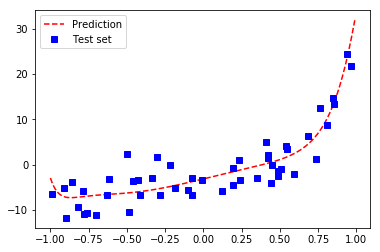

In [5]:
w = getMatrixRegul(pows, y_train, optimal_lambda, 20)
pred = []

for i in index:
    pred.append(getModelFunction(i, w, 20))
x_test , y_test = load_dataset("./Datasets/Dataset_1_test.csv")
plt.plot(index, pred, 'r--', x_test,y_test, 'bs') 
plt.legend(['Prediction', 'Test set'])
plt.show

print("Test MSE : " ,(compute_MSE(x_test,y_test,getModelFunction, w_matrix, 20)))


d) The model is not overfitting since the test MSE is not significantly higher than the training and validation MSE. Moreover this seems to be the best fit we can achieve on the test set.

## Question 3

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

#define
PLOT_STEP =1

def load_dataset(path, dataset):
        
    # Loading spam-emails:
    with open(path, 'r', newline='\n') as csvfile:
        reader = csv.reader(csvfile,  quoting=csv.QUOTE_NONNUMERIC)
        for line in reader:
            dataset.append((line[0], line[1]))
        
        print ("Total number of data: ", len(dataset))
path = './Datasets/Dataset_2_train.csv'
train = []
load_dataset(path, train)

#Validation set
path = './Datasets/Dataset_2_valid.csv'
validation=[]
load_dataset(path, validation)

#Test set
path = './Datasets/Dataset_2_test.csv'
test=[]
load_dataset(path, test)


Total number of data:  300
Total number of data:  100
Total number of data:  100


### 1) Stochastic Gradient Descent
##### Linear regression prediction is Y = W0 +W1 *x


In [7]:

def computeMSE(data, param):
    Sum =0
    
    for line in data:
        prediction= param[0] +param[1]*line[0]
        Sum+= ((prediction- line[1])* ((prediction- line[1])))
    Sum /=(2*len(data)) 
    #print(len(data))
    return Sum

def visualizeFit(data, param):
    prediction=[]
    labels=[]
    inp=[]
    for line in data:
        inp.append(line[0])
        prediction.append(param[0] +param[1]*line[0])
        labels.append(line[1])
        
    plt.title("Visualize")    
    plt.plot(inp, labels, 'ro', inp, prediction, 'bs')
    plt.legend(["real", "prediction"])
    plt.show()

Validation performance :  0.049661624899147466


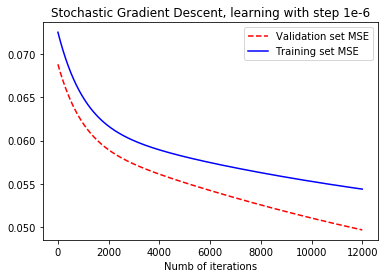

In [8]:
#Defining parameters randomly
param=[4,4]

def epoch(dataset, param, step):
    for line in dataset:
        prediction= param[0] +param[1]*line[0]
        difference = prediction -line[1]  #Y^- Y
        
        param[0] -= step*difference
        param[1] -= step*difference*line[0]


validationMSE=[]
trainMSE=[]
rand_visu = random.sample(range(1, len(test)), 5)
parameters=[]
        
def GradientDescent(train, validation,  param, step, maxError, maxIter):
    val_MSE = computeMSE(validation, param)
    validationMSE.append(val_MSE)
    trainMSE.append(computeMSE(train, param))
    ite=0
    while(val_MSE >= maxError and ite < maxIter):
        epoch(train, param, step)
        val_MSE= computeMSE(validation, param)
        ite+=1
        
        #Saving MSE of each epoch
        if(ite in rand_visu):
            parameters.append([param[0],param[1]])
        validationMSE.append(val_MSE)
        trainMSE.append(computeMSE(train, param))
    
        random.shuffle(train)      #Shuffling train set to not get stuck in local minima
        
    #print("param = ",param, "\nNumber of iterations: ", ite)
    #print(len(validationMSE))
    


GradientDescent(train, validation, param, 1e-6, 0.01, 12000 )

#print(computeMSE(train, param))

print("Validation performance : ",computeMSE(validation, param))

index= np.arange(0, len(validationMSE),1)

#print(index)
plt.title("Stochastic Gradient Descent, learning with step 1e-6")
plt.plot(index*PLOT_STEP, validationMSE, 'r--',index*PLOT_STEP, trainMSE, 'b')
plt.legend(['Validation set MSE', 'Training set MSE'])

#plt.subplot(212)
#plt.plot(index*PLOT_STEP, trainMSE, 'b--')
#plt.legend(['Training set MSE'])
plt.xlabel('Numb of iterations')

plt.show()


Random sampling:  [95, 89, 28, 35, 64]
Validation performance :  0.0369776341692163


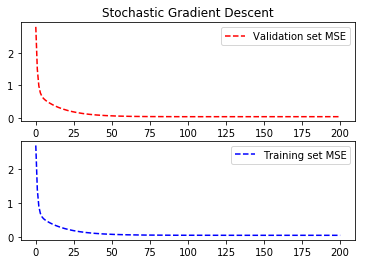

Test performance :  0.0346751450720167


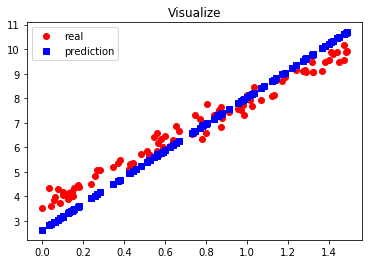

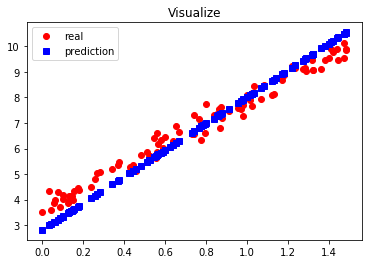

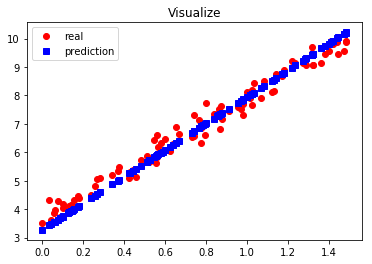

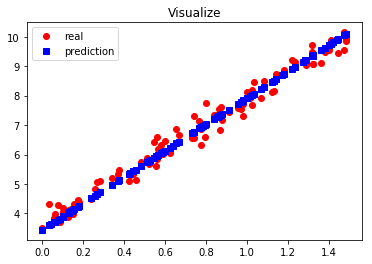

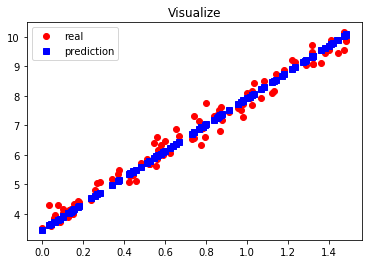

In [9]:
validationMSE=[]

trainMSE=[]
param=[0.1,6]
rand_visu = random.sample(range(1, len(test)), 5)
print("Random sampling: ",rand_visu)
parameters=[]
        
GradientDescent(train, validation, param, 1e-3, 0.01, 200 )
#print(index)

print("Validation performance : ",computeMSE(validation, param))

index= np.arange(0, len(validationMSE),1)
plt.figure(1)
plt.subplot(211)
plt.title("Stochastic Gradient Descent")
plt.plot(index*PLOT_STEP, validationMSE, 'r--')

plt.xlabel('Numb of iterations')
plt.legend(['Validation set MSE'])

plt.subplot(212)
plt.plot(index*PLOT_STEP, trainMSE, 'b--')
plt.legend(['Training set MSE'])

plt.show()

print("Test performance : ",computeMSE(test, param))


visualizeFit(test, parameters[0])
visualizeFit(test, parameters[1])
visualizeFit(test, parameters[2])
visualizeFit(test, parameters[3])
visualizeFit(test, parameters[4])



# Question 4: Real life dataset

### 1)
#### a) Filling the missing values with the mean of the column.
    This is not a really good solution since the mean is highly influenced by extreme values and if there are a lot of missing values in a column, every one is gonna be replaced by the same mean value. It removes informations about diversity and distribution about the original dataset.

In [10]:
from pandas import read_csv
from sklearn.preprocessing import Imputer
import numpy as np
import pandas as pd
from sklearn import model_selection

import matplotlib.pyplot as plt



all_attributes = []
with open("./Datasets/names.txt") as f:
    for line in f:
        if line.find("@attribute") != -1:
            line = line.replace("@attribute", "")
            line = line.replace("string", "")
            line = line.replace("numeric", "")
            line = line.replace("\n", "")
            all_attributes.append(line)
all_attributes[4] ='Free coef'
            
dataset = read_csv('./Datasets/communities.data.csv', delimiter = ",", names = all_attributes, na_values = "?")

#Remove non predictive fields/data
dataset = dataset.iloc[:, 4:]

#Y is the independant variable
Y= dataset.iloc[:, -1]

#Dataset is the dependant variables (features)
dataset= dataset.iloc[:, :-1]
dataset.iloc[:, 0]= np.ones(dataset.shape[0]) #Adding a free coefficient to the X vectors

# fill missing values with mean column values
imputer = Imputer(missing_values='NaN', strategy='mean')
imputer = imputer.fit(dataset.values)
transformed_values = imputer.fit_transform(dataset.values)
# count the number of NaN values in each column

#transformed_values= transformed_values.transpose()

transformed_values= pd.DataFrame(transformed_values, columns=all_attributes[4:-1])
#print( transformed_values.transpose)
#transformed_values
#print (Y.shape)

### b) We could fill the missing values with other methods.
The median of each column for example, will be more representative of the majority of data than the mean. It may be that the mean and median are the same in some cases. 
We could also use a random value picked in the column to fill messing values. This will keep the diversity of original dataset but might alter the correlation between features and labels.

In [11]:

imputer2 = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer2 = imputer2.fit(dataset)
transformed_values= imputer2.fit_transform(dataset)
#transformed_values= transformed_values.transpose()     #Putting to 123 rows and 1995 columns format

transformed_values= pd.DataFrame(transformed_values , columns=all_attributes[4:-1])

np.savetxt("./Datasets/completeCommunityMedian.csv", transformed_values.values, delimiter=",")


#print(transformed_values)
def getCoefMatrix(X_train ,Y_train):
    #print(transformed_values.transpose(copy='true'))
    df= pd.DataFrame(np.linalg.pinv(X_train))
    W = np.dot(df.values.transpose(), Y_train)
    #print("W= " ,W)
    return W

def computeeMSE (test, param, labels):
    sum=0
    sum1=0
    predictions = np.dot(param.transpose(), test.transpose())
    sum+= np.sum((predictions[:] -labels[:])**2)
    #print(sum, sum/len(predictions))
    #for i in range(len(predictions)):
     #   temp = predictions[i]- labels[i]
      #  sum1+= temp*temp
    #print( sum1)
    return sum/len(predictions)


def LinearReg5KFold(transformed_values, Y, save=False):
    kFold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
    avgMSE= 0
    i=1
    for train_index, test_index in kFold.split(transformed_values):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = transformed_values.values[train_index], transformed_values.values[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        if save:
            # Save 5 cross validation sets
            path= "./Datasets/CandC-train<" + str(i)+ ">.csv"
            np.savetxt(path, X_train, delimiter=",")
            path= "./Datasets/CandC-test<" + str(i)+ ">.csv"
            np.savetxt(path, X_test, delimiter=",")

        coefMatrix = getCoefMatrix(X_train.transpose(), y_train)
        avgMSE+= computeeMSE(X_test, coefMatrix, y_test.values)
        i+=1
    print("The averaged MSE over  5-fold cross-validation error is :", avgMSE/5)

LinearReg5KFold(transformed_values, Y, True)

The averaged MSE over  5-fold cross-validation error is : 0.0194903025306669


## 3. Ridge regression

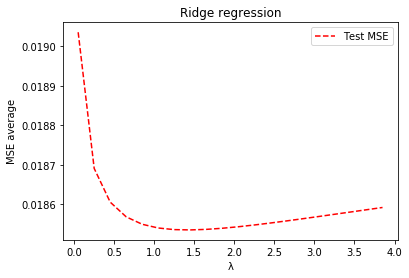

optimal_avg_mse= 0.018534912884940104   optimal_lambda= 1.4500000000000002


In [12]:

def getCoefMatrixRidge(X_train, Y_train, lamb):
    #print(Y_train)
    temp1 = np.dot(X_train.transpose(), X_train)
    temp2 = temp1 + lamb* np.eye(temp1.shape[0], temp1.shape[0])
    temp2 = np.linalg.inv(temp2)
    temp3 = np.dot(temp2 ,X_train.transpose())
    W= np.dot(temp3 , Y_train)
    return W
#getCoefMatrixRidge(transformed_values.values , Y.values, lamb=3)

kFold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
def LinearReg5KRidge(transformed_values, Y, lamb):
    avgMSE= 0
    avgMSEtrain=0
    for train_index, test_index in kFold.split(transformed_values):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = transformed_values.values[train_index], transformed_values.values[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        coefMatrix = getCoefMatrixRidge(X_train, y_train, lamb)
        avgMSE+= computeeMSE(X_test, coefMatrix, y_test.values)
        avgMSEtrain +=computeeMSE(X_train, coefMatrix, y_train.values)
    return avgMSE/5 ,avgMSEtrain/5
    #print("The averaged MSE over  5-fold cross-validation error is :", avgMSE/5)
mseArray=[]
mseArrayTrain=[]
optimal_lambda=0
optimal_avg_mse= 1000
rang= np.arange(0.05, 4., 0.2)
for lamb in rang:
    
    avgMSE ,avgMSEtrain =LinearReg5KRidge(transformed_values, Y, lamb)
    mseArray.append(avgMSE)
    mseArrayTrain.append(avgMSEtrain)
    
    if(avgMSE <optimal_avg_mse):   # Updates best hyperparameters
        optimal_avg_mse= avgMSE
        optimal_lambda=lamb
    
    #avgMSE= LinearReg5KRidge()
    #print("The averaged MSE over  5-fold cross-validation error is :", avgMSE/5)
    
    
plt.plot(rang, mseArray, 'r--') #, rang, mseArrayTrain, 'b--')
plt.title("Ridge regression")
plt.xlabel('λ')
plt.ylabel('MSE average')
plt.legend(['Test MSE'])#, 'Train MSE'])
plt.show()
print("optimal_avg_mse= {}   optimal_lambda= {}" .format(optimal_avg_mse, optimal_lambda))

b) We could indeed use these results for feature selection. We learned that the Ridge regression is in fact  constraining the coefficient in a multi dimensional sphere  of radius λ. Here, minimal average MSE is achieved with λ=1.3 then we could use this value to restrain some features which lead to too high coefficient is the W matrix. 

In [13]:
W = np.zeros((123))
kFold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
for train_index, test_index in kFold.split(transformed_values):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = transformed_values.values[train_index], transformed_values.values[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        coefMatrix = getCoefMatrixRidge(X_train, y_train, optimal_lambda)
        W +=coefMatrix

# Finding indexes where really low coefficients are achieved
W /=5
good_feat= np.abs((W))>0.04
reduced_feat =transformed_values.iloc[:, good_feat]

LinearReg5KFold(reduced_feat, Y)
#print(predictions)
#y_test

The averaged MSE over  5-fold cross-validation error is : 0.018266029094430033


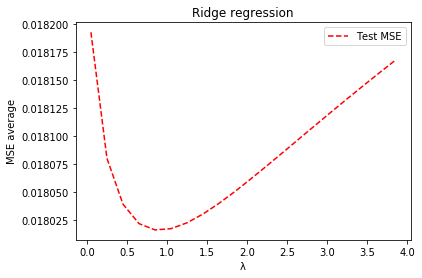

optimal_avg_mse= 0.018016167942022557   optimal_lambda= 0.8500000000000001


In [14]:

mseArray=[]
mseArrayTrain=[]
optimal_lambda=0
optimal_avg_mse= 1000
rang= np.arange(0.05, 4., 0.2)
for lamb in rang:
    
    avgMSE ,avgMSEtrain =LinearReg5KRidge(reduced_feat, Y, lamb)
    mseArray.append(avgMSE)
    mseArrayTrain.append(avgMSEtrain)
    
    if(avgMSE <optimal_avg_mse):   # Updates best hyperparameters
        optimal_avg_mse= avgMSE
        optimal_lambda=lamb
    
    #avgMSE= LinearReg5KRidge()
    #print("The averaged MSE over  5-fold cross-validation error is :", avgMSE/5)
    
    
plt.plot(rang, mseArray, 'r--') #, rang, mseArrayTrain, 'b--')
plt.title("Ridge regression")
plt.xlabel('λ')
plt.ylabel('MSE average')
plt.legend(['Test MSE'])#, 'Train MSE'])
plt.show()
print("optimal_avg_mse= {}   optimal_lambda= {}" .format(optimal_avg_mse, optimal_lambda))